## Necessary librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.layers import Dropout, BatchNormalization

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data importation
df=pd.read_csv('C:/Users/Admin/Desktop/AI&DS/loan_data.csv',sep=',')
df=df.rename(columns={'not.fully.paid': 'target'})

In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
target               0
dtype: int64

In [99]:
print(df.head())

   credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        1    0.1189       829.10       11.350407  19.48   737   
1              1        0    0.1071       228.22       11.082143  14.29   707   
2              1        1    0.1357       366.86       10.373491  11.63   682   
3              1        1    0.1008       162.34       11.350407   8.10   712   
4              1        0    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  target  
0        0       0  
1        0    

In [16]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,target
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [21]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,target
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [39]:
#1.Feature Transformation
##there is just one categorical variable in the dataset (purpose)
def cato(x):
    if x=='credit_card':
        return 0
    elif x=='debt_consolidation':
        return 1
    elif x=='educational':
        return 2
    elif x=='major_purchase':
        return 3
    elif x=='small_business':
        return 4
    else:
        return 5
L=[]
for i in df['purpose']:
    L.append(cato(i))
df["purpose"]=L

In [41]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,target
9573,0,5,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,5,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,1,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,5,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,1,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [44]:
#Exploratory data analysis of different factors of the dataset
my_tab = pd.crosstab(index=df["purpose"], columns="count")
my_tab

col_0,count
purpose,
all_other,2331
credit_card,1262
debt_consolidation,3957
educational,343
home_improvement,629
major_purchase,437
small_business,619


#### Most of the purpose of the debt is the debt consolidation follows by credit card

In [47]:
#3. matrice correlation
corrMatrix=df.corr()
corrMatrix

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,target
credit.policy,1.000000,-0.018874,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,-0.018874,1.000000,-0.086548,-0.137451,-0.007396,-0.217542,0.147089,-0.018384,-0.055441,-0.245828,0.061530,0.008584,-0.032723,0.047624
int.rate,-0.294089,-0.086548,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,-0.137451,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,-0.007396,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.217542,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.147089,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.018384,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,-0.055441,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.245828,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


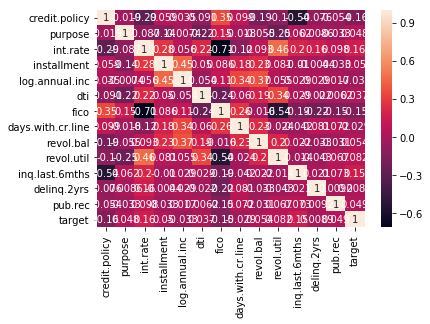

In [49]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#we will consider as higly correlated, two features which the absolute value of their correlation
#is greater than 0.5

# fico and int.rate are highly correlated, also fico and revol.util
#credit policy and inq.last.6months are also correlated

#We are going to ignore the feature fico and credi.policy

In [55]:
###4. Modeling
#let us strart by a single perceptron

X_features=df[['purpose','int.rate','installment','log.annual.inc','dti','days.with.cr.line'
              ,'revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
Y_target=df['target']
x_train,x_test, y_train,y_test=train_test_split(X_features,Y_target,random_state=1)

In [57]:
print(X_features.shape)
print(Y_target.shape)

(9578, 11)
(9578,)


In [59]:
sgd = SGD(lr=0.01)

In [100]:
model = Sequential()
model.add(Dense(1,input_dim=11,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
loss = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.8, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)

print("score=", score)


score= [12.68328857421875, 0.16826722025871277]


In [ ]:
##the accuracy is very low 16.82%. Let build a Deep learning model

In [111]:
## Deep MLP

model2 = Sequential()
model2.add(Dense(100,input_dim=11, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='softmax'))
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model2.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 100)               1200      
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 505       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 6         
Total params: 2,111
Trainable params: 1,911
Non-trainable params: 200
_________________________________________________________________
None


In [115]:
loss = model2.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.8, verbose=0)
score = model2.evaluate(x_test, y_test, verbose=0)



In [114]:
print("score=", score)


score= [0.123, 0.8317327499389648]


In [ ]:
##We get better accuracy with Deep MPL